In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
from google.colab import files


In [0]:
df = pd.read_csv('/content/drive/My Drive/data_train_clean.csv')

print(df.columns)

df = df.drop('Unnamed: 0',axis = 1)


In [0]:
df = df.rename(columns={'clean_comment': 'message'})


In [0]:
df = df.drop('id',axis = 1)
print(df.columns)

Index(['message', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')


In [0]:
print(df.tail())

                                                  message  ...  identity_hate
111694  b'redirect talkjohn loveday experimental physi...  ...              0
111695  b'back it up post the line here with the refer...  ...              0
111696  b'i will not stop that sometimes germanic equa...  ...              0
111697  b' british bands i think you have mistaken sco...  ...              0
111698  b'you are wrong justin thompson is mentioned i...  ...              0

[5 rows x 7 columns]


In [0]:
df1 = df.sort_values(['toxic','severe_toxic'],ascending=[False,True]) 
df1 = df1[6000:]

In [0]:
print(df1.describe())
print(df1.columns)


               toxic   severe_toxic  ...         insult  identity_hate
count  105699.000000  105699.000000  ...  105699.000000  105699.000000
mean        0.044579       0.010492  ...       0.027134       0.005222
std         0.206379       0.101892  ...       0.162474       0.072077
min         0.000000       0.000000  ...       0.000000       0.000000
25%         0.000000       0.000000  ...       0.000000       0.000000
50%         0.000000       0.000000  ...       0.000000       0.000000
75%         0.000000       0.000000  ...       0.000000       0.000000
max         1.000000       1.000000  ...       1.000000       1.000000

[8 rows x 6 columns]
Index(['message', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')


In [0]:
print(df1['toxic'].value_counts())
print(df1['severe_toxic'].value_counts())

0    100987
1      4712
Name: toxic, dtype: int64
0    104590
1      1109
Name: severe_toxic, dtype: int64


In [0]:
df1 = df1.drop('severe_toxic',axis = 1)
df1.describe()

,toxic,obscene,threat,insult,identity_hate
count,105699.000000,105699.000000,105699.000000,105699.000000,105699.000000
mean,0.044579,0.029452,0.001949,0.027134,0.005222
std,0.206379,0.169069,0.044104,0.162474,0.072077
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df2 = df1.drop(df1[df1.threat == 1].index)
df2 = df2.drop('threat',axis = 1)
df2.describe()

,toxic,obscene,insult,identity_hate
count,105493.000000,105493.000000,105493.000000,105493.000000
mean,0.042922,0.028201,0.025897,0.004749
std,0.202683,0.165547,0.158830,0.068750
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [0]:
df3 = df2.drop(df2[df2.identity_hate == 1].index)
df3 = df3.drop('identity_hate',axis = 1)
print(df3['toxic'].value_counts())
print(df3['obscene'].value_counts())
print(df3['insult'].value_counts())


0    100895
1      4097
Name: toxic, dtype: int64
0    102375
1      2617
Name: obscene, dtype: int64
0    102673
1      2319
Name: insult, dtype: int64


In [0]:
df3.describe()

,toxic,obscene,insult
count,104992.000000,104992.000000,104992.000000
mean,0.039022,0.024926,0.022087
std,0.193648,0.155899,0.146969
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [0]:
df3 = df3.sort_values(['toxic','obscene','insult'],ascending=[True,True,True]) 
df4 = df3[95000:]
from sklearn.utils import shuffle
df4 = shuffle(df4)


In [0]:
print(df4.tail())
rc = pd.read_csv('/content/drive/My Drive/racismsexism.csv')
rc.tail()

                                                  message  ...  insult
1769    b'ps im a fucking cunt rag and enjoy the taste...  ...       0
109892  b'jakew funny how it is always the circumcisio...  ...       0
87000   b'october utc you really are a stupid person a...  ...       0
32974   b'maybe you dont understand the heirachy you f...  ...       1
109203       b'just to make it clear i reworded it a bit'  ...       0

[5 rows x 4 columns]


,Unnamed: 0,Message,Racism,Sexism
5049,16077,b'mkr mkr i think kat thinks she is the best c...,0,1
5050,16082,b'remind me when i said fiction reality do not...,0,1
5051,16084,b'lmfao lmfao who cares about the women ufc ti...,0,1
5052,16085,b' i want equal rights but i still want your s...,0,1
5053,16086,b' go ahead and call me sexist but scandalous ...,0,1


In [0]:
rc = rc.drop('Unnamed: 0',axis = 1)
rc.tail()

,Message,Racism,Sexism
5049,b'mkr mkr i think kat thinks she is the best c...,0,1
5050,b'remind me when i said fiction reality do not...,0,1
5051,b'lmfao lmfao who cares about the women ufc ti...,0,1
5052,b' i want equal rights but i still want your s...,0,1
5053,b' go ahead and call me sexist but scandalous ...,0,1


In [0]:
df4['racism'] = 0
df4['sexism'] = 0
df4.tail()

,message,toxic,obscene,insult,racism,sexism
1769,b'ps im a fucking cunt rag and enjoy the taste...,1,1,0,0,0
109892,b'jakew funny how it is always the circumcisio...,0,0,0,0,0
87000,b'october utc you really are a stupid person a...,1,1,0,0,0
32974,b'maybe you dont understand the heirachy you f...,1,1,1,0,0
109203,b'just to make it clear i reworded it a bit',0,0,0,0,0


In [0]:
rc['toxic'] =0
rc['obscene'] =0
rc['insult'] =0
rc = rc.rename(columns={'Message': 'message', 'Racism': 'racism','Sexism': 'sexism'})
rc = rc[['message', 'toxic', 'obscene', 'insult', 'racism','sexism']]
rcs = rc[:1938]
scm = rc[2938:]
rcs = rcs.append(scm)
# print(rcs.describe())
# print(scm.describe())
rc = rcs
print(rc.describe())


        toxic  obscene  insult       racism       sexism
count  4054.0   4054.0  4054.0  4054.000000  4054.000000
mean      0.0      0.0     0.0     0.477800     0.522200
std       0.0      0.0     0.0     0.499569     0.499569
min       0.0      0.0     0.0     0.000000     0.000000
25%       0.0      0.0     0.0     0.000000     0.000000
50%       0.0      0.0     0.0     0.000000     1.000000
75%       0.0      0.0     0.0     1.000000     1.000000
max       0.0      0.0     0.0     1.000000     1.000000


In [0]:
rc['racism'].value_counts()

0    2117
1    1937
Name: racism, dtype: int64

In [0]:
df5 = df4.append(rc)

In [0]:
print(df5.head())
print(df5.tail())
# print(df4.describe())
# print(rc.describe())
# print(df5.describe())

                                                  message  ...  sexism
107776  b'please do not add nonsense to wikipedia it i...  ...       0
109640  b'deletion discussion about perfect world depr...  ...       0
86546   b' douchebag it appears you have a fan of your...  ...       0
108435  b' thank you now please desist from threatenin...  ...       0
15059   b' funny usage there used to be a very amusing...  ...       0

[5 rows x 6 columns]
                                                message  toxic  ...  racism  sexism
5049  b'mkr mkr i think kat thinks she is the best c...      0  ...       0       1
5050  b'remind me when i said fiction reality do not...      0  ...       0       1
5051  b'lmfao lmfao who cares about the women ufc ti...      0  ...       0       1
5052  b' i want equal rights but i still want your s...      0  ...       0       1
5053  b' go ahead and call me sexist but scandalous ...      0  ...       0       1

[5 rows x 6 columns]


In [0]:
df5 = shuffle(df5)
df5 = shuffle(df5)
df5 = shuffle(df5)
df5.to_csv('finalcleandata.csv',index=False)
files.download('finalcleandata.csv')


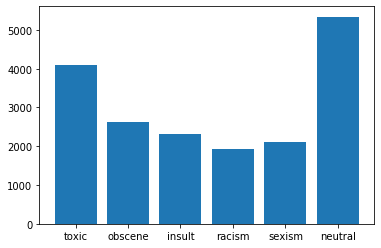

[4097, 2617, 2319, 1937, 2117, 5341]
18428


In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()

insult = df5[df5.insult==1]
toxic = df5[df5.toxic==1]
obscene = df5[df5.obscene==1]
racism = df5[df5.racism==1]
sexism = df5[df5.sexism==1]
neutral = df5[(df5.insult==0) & (df5.toxic==0) & (df5.obscene==0) & (df5.racism==0) & (df5.sexism==0)]

x = ['toxic', 'obscene','insult', 'racism','sexism','neutral']
height=[len(toxic), len(obscene), len(insult), len(racism),len(sexism),len(neutral)]
plt.bar(x, height, width=0.8)
plt.show()
print(height)
print(sum(height))